In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv('sl1.csv')

In [6]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [7]:
target= df['Price']

In [8]:
features= df.drop('Price',axis=1)

In [9]:
features

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [10]:
target

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [11]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.7,random_state=10)
x_train

,Area
0,2600
4,4000
1,3000


In [12]:
y_train

0    550000
4    725000
1    565000
Name: Price, dtype: int64

In [13]:
x_test

,Area
2,3200
3,3600


In [14]:
y_test

2    610000
3    680000
Name: Price, dtype: int64

## Simple Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_model= LinearRegression()

In [17]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=lin_model.predict(x_test)
y_pred

array([613333.33333333, 666025.64102564])

In [21]:
x_test

,Area
2,3200
3,3600


In [22]:
lin_model.intercept_

191794.87179487193

In [23]:
lin_model.coef_

array([131.73076923])

In [24]:
# B0+B1*Area
191794.87179487193+(131.73076923*3200)

613333.3333308719

In [25]:
y_test

2    610000
3    680000
Name: Price, dtype: int64

In [26]:
y_pred

array([613333.33333333, 666025.64102564])

In [27]:
sse= ((y_test-y_pred)**2).sum()
sse

206393819.85535926

In [28]:
error

NameError: name 'error' is not defined

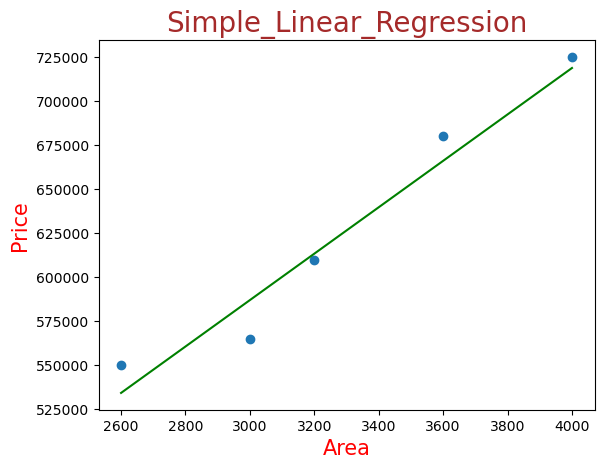

In [29]:
plt.scatter(df.Area,df.Price)
plt.xlabel('Area',size=15,color='red')
plt.ylabel('Price',size=15,color='red')
plt.title('Simple_Linear_Regression',size=20,color='brown')
plt.plot(df.Area, lin_model.predict(df[['Area']]),color='green')

In [30]:
lin_model.score(x_test,y_test)

0.9157576245488329

## Multiple Linear Regression

In [31]:
house= pd.read_csv('Housing_data.csv')

In [32]:
house.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [33]:
house.shape

(1047, 7)

In [34]:
house.size

7329

In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [36]:
house.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [37]:
house.duplicated().any()

True

In [38]:
house.drop_duplicates(inplace=True)

In [39]:
house

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...,...
1042,387652,3504,2.5,5,0.90,0,1
1043,391842,3003,3.5,4,0.46,88,1
1044,394532,3361,3.5,4,0.71,1,1
1045,432845,3250,2.5,3,0.53,23,1


In [40]:
target= house['Price']

In [41]:
target

0        16858
1        26049
2        26130
3        31113
4        40932
         ...  
1042    387652
1043    391842
1044    394532
1045    432845
1046    446436
Name: Price, Length: 1035, dtype: int64

In [42]:
features= house.drop('Price',axis=1)

In [43]:
features

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629,1.0,3,0.76,180,0
1,1344,2.0,3,0.92,13,0
2,822,1.0,2,0.56,173,0
3,1540,1.0,2,0.04,115,0
4,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...
1042,3504,2.5,5,0.90,0,1
1043,3003,3.5,4,0.46,88,1
1044,3361,3.5,4,0.71,1,1
1045,3250,2.5,3,0.53,23,1


In [44]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.85,random_state=70)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(879, 6)
(156, 6)
(879,)
(156,)


In [46]:
lin_model1= LinearRegression()

In [47]:
lin_model1.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred= lin_model1.predict(x_test)

In [49]:
y_pred

array([185847.2459242 , 134126.72808847, 169003.78735592, 172075.71348395,
       246435.82902999, 217622.07189135, 206499.95590471, 133397.34780186,
       233674.18662585, 140184.02373804, 212443.13433124, 146630.09634982,
       155811.71801902,  85127.93144474, 209478.02527241, 128811.16368862,
       147518.24793122, 216064.08335427, 144624.36958609, 130673.68484115,
       182564.44922093, 156554.37789038, 124522.54187563, 144099.95360738,
       248123.06692496, 178441.73545717, 166186.28801363, 235862.3469366 ,
        90394.01632499, 133498.60030494, 282171.54630158,  96753.39075246,
       106973.38547116,  82907.44090691, 149298.01566081, 204387.78562343,
       135989.82327292, 153016.76493272, 226009.11947421, 287225.86819726,
       131111.6011777 , 148143.2502567 , 271171.24946007, 123713.00088551,
       226988.13813707, 205346.30246818,  98170.38886783, 160427.56625582,
        98736.94686495, 294057.85301059, 182479.12766786, 256598.80050733,
        74902.46386086, 2

In [91]:
lin_model1.intercept_

28809.443279301428

In [92]:
lin_model1.coef_

array([   67.66446876, 12177.43310484, -4008.0022404 ,   960.07988117,
        -218.95816828, 12855.89390356])

In [93]:
lin_model1.score(x_test,y_test)

0.6652966982375099

In [94]:
sse= ((y_pred-y_test)**2).sum()
sse

274514464288.0021

In [95]:
y_test.shape

(156,)

In [96]:
y_pred.shape

(156,)

In [97]:
sst= ((y_test-y_test.mean())**2).sum()
sst

820172561317.6089

In [98]:
Rsquared= 1-(sse/sst)
Rsquared

0.6652966982375099

In [99]:
import seaborn as sns

<Axes: xlabel='Price'>

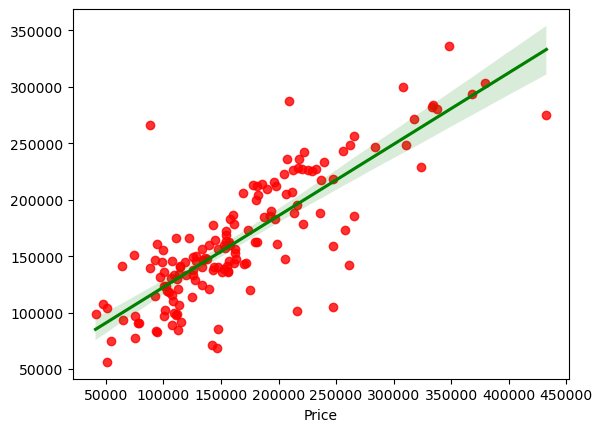

In [102]:
sns.regplot(data=house, x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [104]:
import statsmodels.formula.api as sns
import statsmodels.api as ss